# Python (plus Pandas) Support for Dates

In [1]:
# datetime is a useful Python module
from datetime import datetime

In [2]:
# get current date and time
now = datetime.now()
print(now) # print yields "human readable" date

2018-12-14 14:01:41.756506


In [3]:
now # this yields more of "machine readable" date

datetime.datetime(2018, 12, 14, 14, 1, 41, 756506)

In [4]:
now.year, now.month, now.day

(2018, 12, 14)

In [5]:
# we can easily add/subtract dates
delta = datetime(2018, 6, 14) - datetime(2003, 6, 14)
delta

datetime.timedelta(days=5479)

In [6]:
delta.days, delta.seconds

(5479, 0)

In [7]:
from datetime import timedelta
print(datetime.now() + timedelta(12)) # 12 days from today

2018-12-26 14:03:51.949269


In [8]:
datetime(2018, 2, 18) + timedelta(12)

datetime.datetime(2018, 3, 2, 0, 0)

In [9]:
print(datetime(2018, 2, 18))

2018-02-18 00:00:00


In [10]:
datetime(2018, 2, 18).strftime('%Y-%m-%d')

'2018-02-18'

In [11]:
datetime.strptime('2018-02-18', '%Y-%m-%d')

datetime.datetime(2018, 2, 18, 0, 0)

In [12]:
# Python's dateutil parser can be super handy
from dateutil.parser import parse
parse('2018-02-18')

datetime.datetime(2018, 2, 18, 0, 0)

In [13]:
parse('2/12/2018')

datetime.datetime(2018, 2, 12, 0, 0)

In [14]:
# can of course deal with non-U.S. formats
parse('2/12/2018', dayfirst=True)

datetime.datetime(2018, 12, 2, 0, 0)

In [15]:
# we can import dates into Pandas
dates = ['2018-02-18 12:00:00', '2018-02-05 14:30:00', '2018-03-09 17:35:00']

import pandas as pd
pd.to_datetime(dates)

DatetimeIndex(['2018-02-18 12:00:00', '2018-02-05 14:30:00',
               '2018-03-09 17:35:00'],
              dtype='datetime64[ns]', freq=None)

In [16]:
# Pandas handles missing dates well, just as it handles others missing data
date_idx = pd.to_datetime(dates + [None])
date_idx

DatetimeIndex(['2018-02-18 12:00:00', '2018-02-05 14:30:00',
               '2018-03-09 17:35:00', 'NaT'],
              dtype='datetime64[ns]', freq=None)

In [17]:
pd.isnull(date_idx)

array([False, False, False,  True])

In [18]:
# We can create a range of dates for timeseries data
index = pd.date_range('2/18/2018', periods=1000)
index

DatetimeIndex(['2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
               '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
               '2018-02-26', '2018-02-27',
               ...
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [19]:
len(index)

1000

In [20]:
index[:20:2]

DatetimeIndex(['2018-02-18', '2018-02-20', '2018-02-22', '2018-02-24',
               '2018-02-26', '2018-02-28', '2018-03-02', '2018-03-04',
               '2018-03-06', '2018-03-08'],
              dtype='datetime64[ns]', freq='2D')

In [21]:
import numpy as np
dates = pd.Series(np.random.random(1000), index=index)

In [22]:
dates['2018/03/15':'2018/03/20']

2018-03-15    0.350135
2018-03-16    0.542048
2018-03-17    0.464769
2018-03-18    0.338139
2018-03-19    0.060581
2018-03-20    0.971619
Freq: D, dtype: float64

In [23]:
from pandas.tseries.offsets import Day, MonthEnd

In [24]:
now = datetime(2018, 2, 18)

In [25]:
now + 6 * Day()

Timestamp('2018-02-24 00:00:00')

In [26]:
now + MonthEnd()

Timestamp('2018-02-28 00:00:00')

In [27]:
now + MonthEnd(3)

Timestamp('2018-04-30 00:00:00')

In [28]:
now

datetime.datetime(2018, 2, 18, 0, 0)

In [29]:
import pandas as pd

# This example is taken from "Python for Data Analysis" by Wes McKinney
#
# let's read in some stock data 
close_px_all = pd.read_csv('data/stock.csv', parse_dates=True, index_col=0)
close_px_all.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [30]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [31]:
# The data has closing prices for business days only, since the
# stock market is closed on weekends. We resample and fill forward
# in order to ensure we have data for every day of the period.
close_px = close_px.resample('D').ffill()
close_px.head(15)

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-03,8.00,0.51,6.24
1990-02-04,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
1990-02-08,7.71,0.51,6.35
1990-02-09,8.00,0.52,6.37
1990-02-10,8.00,0.52,6.37


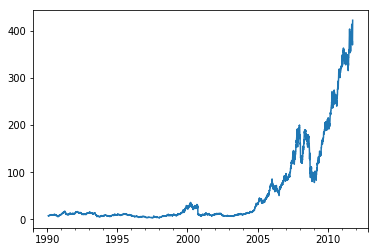

In [32]:
# let's plot Apple's closing prices 
%matplotlib inline
close_px.AAPL.plot();

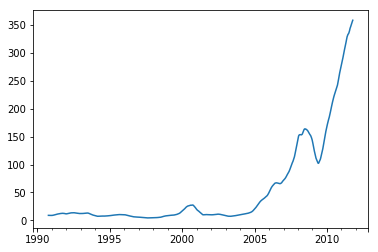

In [34]:
# ...and smooth out the curve by computing a "rolling average"
close_px.AAPL.rolling(250).mean().plot();

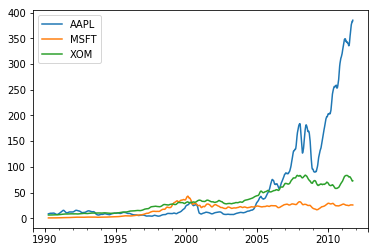

In [35]:
# 60-day rolling average of all three stocks
close_px.rolling(60).mean().plot();

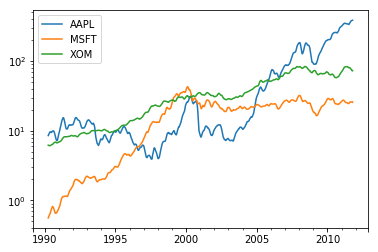

In [36]:
close_px.rolling(60).mean().plot(logy=True);

In [37]:
# The argument to rolling can be an int, as above, or an offset. 
#
# If the argument is an int, each window will be a fixed size, 
# whereas an offset is interpreted as the time period of each
# window. (Each window will therefore be variable-sized based
# on theobservations included in the time period.)

close_px.rolling('20D').mean().head(25)

,AAPL,MSFT,XOM
1990-02-01,7.860000,0.510000,6.120000
1990-02-02,7.930000,0.510000,6.180000
1990-02-03,7.953333,0.510000,6.200000
1990-02-04,7.965000,0.510000,6.210000
1990-02-05,8.008000,0.510000,6.218000
1990-02-06,8.026667,0.510000,6.220000
1990-02-07,7.990000,0.510000,6.235714
1990-02-08,7.955000,0.510000,6.250000
1990-02-09,7.960000,0.511111,6.263333
1990-02-10,7.964000,0.512000,6.274000


In [38]:
close_px.rolling(20).mean().head(25)

,AAPL,MSFT,XOM
1990-02-01,NaN,NaN,NaN
1990-02-02,NaN,NaN,NaN
1990-02-03,NaN,NaN,NaN
1990-02-04,NaN,NaN,NaN
1990-02-05,NaN,NaN,NaN
1990-02-06,NaN,NaN,NaN
1990-02-07,NaN,NaN,NaN
1990-02-08,NaN,NaN,NaN
1990-02-09,NaN,NaN,NaN
1990-02-10,NaN,NaN,NaN
